In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

### 1. 데이터 불러오기

In [ ]:
path = "/content/drive/MyDrive/team_project1/data/"

In [ ]:
df = pd.read_csv(path + "Regression_data_onehot.csv")
print(df.shape)
df.head()

(4177, 11)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


### 2. 데이터 나누기

In [ ]:
X = df.drop('Rings', axis=1)
y = df['Rings']

X.shape, y.shape

((4177, 10), (4177,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape

((3341, 10), (836, 10))

### 3. 학습 관련 함수 정의
- 손실 계산 함수 -> 베이스 모델 함수와 동일한 지표
- 정확도 계산 함수 -> 베이스 모델 함수와 동일한 지표

In [ ]:
# loss
def mse(y_true, y_pred):
  return mean_squared_error(y_true, y_pred)

In [ ]:
# 정확도 계산
def eval_accuracy(y, y_hat):
	# 오차율 구하는 과정    
	# np.mean() 메서드의 이유는 미니배치 처리를 고려하여 하나의 지표로 묶어주기 위함 입니다. 
    mdiff = np.mean(np.abs((y_hat - y) / y))
    # 1 에서 오차율을 빼 정확도를 구합니다. 
    return 1 - mdiff

### 4. 선형 회귀 모델 간의 비교

#### 4-1. 기본 선형 모델

In [ ]:
# 모델 정의
lr = LinearRegression()

In [ ]:
# 학습
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [ ]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss= {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 4.816, Accuracy = 0.841 / Test - Loss= 4.454, Accuracy = 0.846


#### 4-2. 릿지 선형 모델

In [ ]:
# 모델 정의 
ridge = Ridge()

In [ ]:
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# 예측
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [ ]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss= {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 4.889, Accuracy = 0.840 / Test - Loss= 4.425, Accuracy = 0.846


Text(0.5, 1.0, 'The coefficient value predicted by the Ridge model')

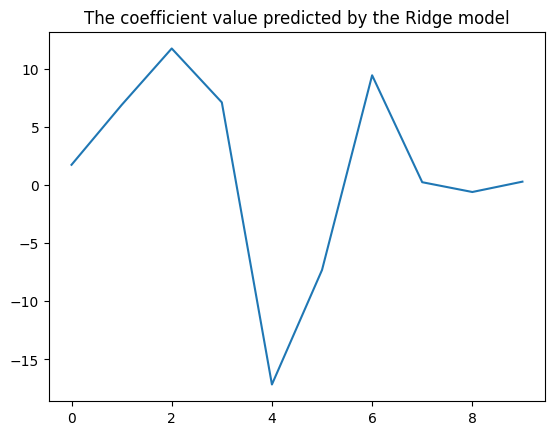

In [ ]:
plt.plot(ridge.coef_)
plt.title("The coefficient value predicted by the Ridge model")

#### 4-3. 라쏘 선형 모델

In [ ]:
lasso = Lasso()

In [ ]:
# 훈련
lasso.fit(X_train, y_train)

Lasso()

In [ ]:
# 예측
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [ ]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 10.578, Accuracy = 0.730 / Test - Loss= 9.656, Accuracy = 0.733


Text(0.5, 1.0, 'The coefficient value predicted by the Lasso model')

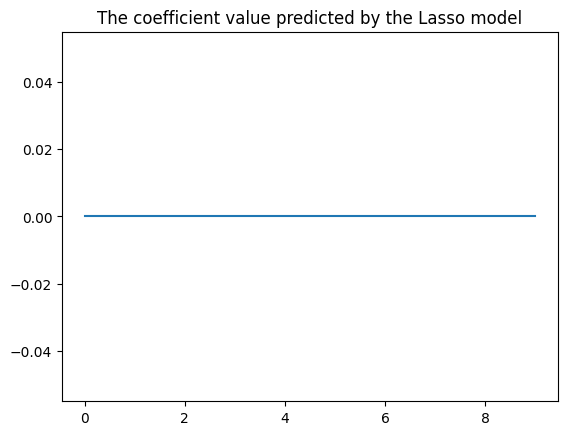

In [ ]:
plt.plot(lasso.coef_)
plt.title("The coefficient value predicted by the Lasso model")

#### 4-4. alpha 값에 따른 릿지 모델 성능 변화
- 기본적으로 alpha = 1.0



In [ ]:
alpha = [0.01, 0.02, 0.05, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
len(alpha)

16

In [ ]:
ridge_train_acc = []
ridge_test_acc = []

In [ ]:
for a in alpha:
  # 모델 정의
  ridge_alpha = Ridge(alpha=a)
  # 훈련
  ridge_alpha.fit(X_train, y_train)
  # 예측
  y_train_pred = ridge_alpha.predict(X_train)
  y_test_pred = ridge_alpha.predict(X_test)

  # 결과 저장
  ridge_train_acc.append(eval_accuracy(y_train, y_train_pred))
  ridge_test_acc.append(eval_accuracy(y_test, y_test_pred))


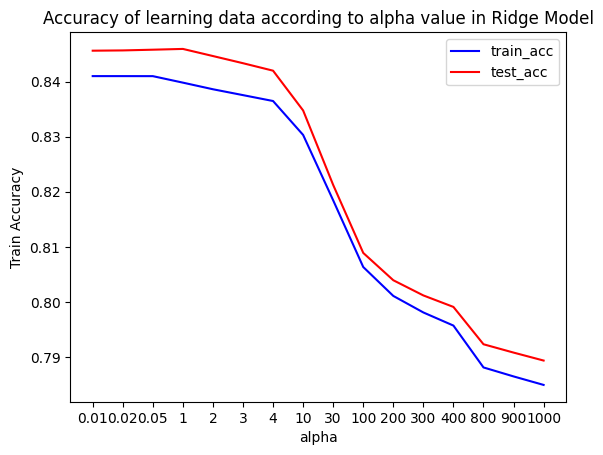

In [ ]:
plt.plot(ridge_train_acc, 'b', label='train_acc')
plt.plot(ridge_test_acc, 'r', label='test_acc')
plt.xticks(list(range(0, 16)), [0.01, 0.02, 0.05, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])

plt.xlabel("alpha")
plt.ylabel("Train Accuracy")

plt.title("Accuracy of learning data according to alpha value in Ridge Model")

plt.legend()
plt.show()

In [ ]:
print(f"train_accuracy의 성능이 가장 높은 alpha: {alpha[ridge_train_acc.index(max(ridge_train_acc))]}")
print(f"test_accuracy의 성능이 가장 높은 alpha: {alpha[ridge_test_acc.index(max(ridge_test_acc))]}")

train_accuracy의 성능이 가장 높은 alpha: 0.01
test_accuracy의 성능이 가장 높은 alpha: 1


#### 4-5. alpha 값에 따른 릿지 모델 성능 변화
- 기본 alpha 값 = 1.0

In [ ]:
lasso_train_acc = []
lasso_test_acc = []

In [ ]:
for a in alpha:
  # 모델 정의
  lasso_alpha = Lasso(alpha=a)
  # 훈련
  lasso_alpha.fit(X_train, y_train)
  # 예측
  y_train_pred = lasso_alpha.predict(X_train)
  y_test_pred = lasso_alpha.predict(X_test)

  # 결과 저장
  lasso_train_acc.append(eval_accuracy(y_train, y_train_pred))
  lasso_test_acc.append(eval_accuracy(y_test, y_test_pred))


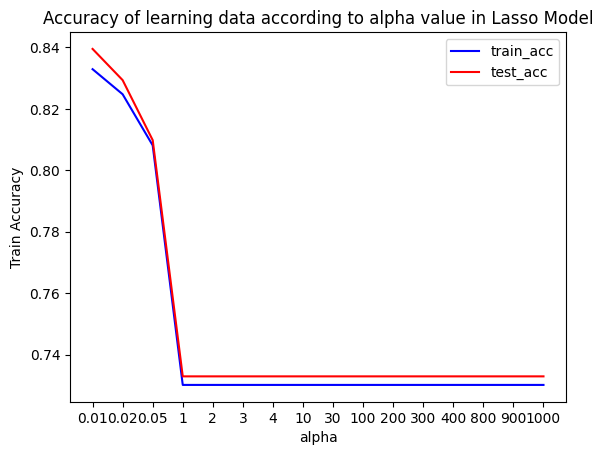

In [ ]:
plt.plot(lasso_train_acc, 'b', label='train_acc')
plt.plot(lasso_test_acc, 'r', label='test_acc')
plt.xticks(list(range(0, 16)), [0.01, 0.02, 0.05, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])

plt.xlabel("alpha")
plt.ylabel("Train Accuracy")

plt.title("Accuracy of learning data according to alpha value in Lasso Model")

plt.legend()
plt.show()

In [ ]:
print(f"train_accuracy의 성능이 가장 높은 alpha: {alpha[lasso_train_acc.index(max(lasso_train_acc))]}")
print(f"test_accuracy의 성능이 가장 높은 alpha: {alpha[lasso_test_acc.index(max(lasso_test_acc))]}")

train_accuracy의 성능이 가장 높은 alpha: 0.01
test_accuracy의 성능이 가장 높은 alpha: 0.01


In [ ]:
lasso_best = Lasso(alpha=0.01)

# 훈련
lasso_best.fit(X_train, y_train)

# 예측
y_train_pred = lasso_best.predict(X_train)
y_test_pred = lasso_best.predict(X_test)

print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 5.157, Accuracy = 0.833 / Test - Loss = 4.616, Accuracy = 0.840


### 5. 트리 회귀 모델 간이 성능 비교

#### 5-1. 랜덤 포레스트 회귀 모델

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# 모델 생성
rf_model = RandomForestRegressor()

In [ ]:
# 학습
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# 예측
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [ ]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.690, Accuracy = 0.942 / Test - Loss = 4.225, Accuracy = 0.853


#### 5-2. Xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
# 모델 정의
xgb = XGBRegressor()

In [ ]:
# 학습
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# 예측
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [ ]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 0.589, Accuracy = 0.941 / Test - Loss = 4.547, Accuracy = 0.847


#### 5-3. LightGBM



In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
# 모델 정의
lgbm = LGBMRegressor()

In [ ]:
# 학습
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
# 예측
y_train_pred = lgbm.predict(X_train)
y_test_pred = lgbm.predict(X_test)

In [ ]:
print(f"Train - Loss = {mse(y_train, y_train_pred):.3f}, Accuracy = {eval_accuracy(y_train, y_train_pred):.3f} / Test - Loss = {mse(y_test, y_test_pred):.3f}, Accuracy = {eval_accuracy(y_test, y_test_pred):.3f}")

Train - Loss = 2.302, Accuracy = 0.885 / Test - Loss = 4.242, Accuracy = 0.853
